In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt # Plotting
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

# download historical disney price data
df_dis = yf.download('DIS', start="2021-10-16", end="2024-10-16")

# remove any NaN values from dataset
df_dis = df_dis.dropna()

# remove all columns except adj close
df_dis = df_dis.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)

df_dis

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2021-10-18,169.800674
2021-10-19,169.840363
2021-10-20,169.215302
2021-10-21,169.999115
2021-10-22,168.094131
...,...
2024-10-09,93.599998
2024-10-10,92.989998
2024-10-11,94.129997


In [ ]:
# change frequency to day
df_dis = df_dis.asfreq('d')
df_dis.index

# delete NaNs for nontrading days
df_dis = df_dis.ffill() # Fill in missing values using previous

df_dis

,Adj Close
Date,
2021-10-18,169.800674
2021-10-19,169.840363
2021-10-20,169.215302
2021-10-21,169.999115
2021-10-22,168.094131
...,...
2024-10-11,94.129997
2024-10-12,94.129997
2024-10-13,94.129997


Lags : [1]


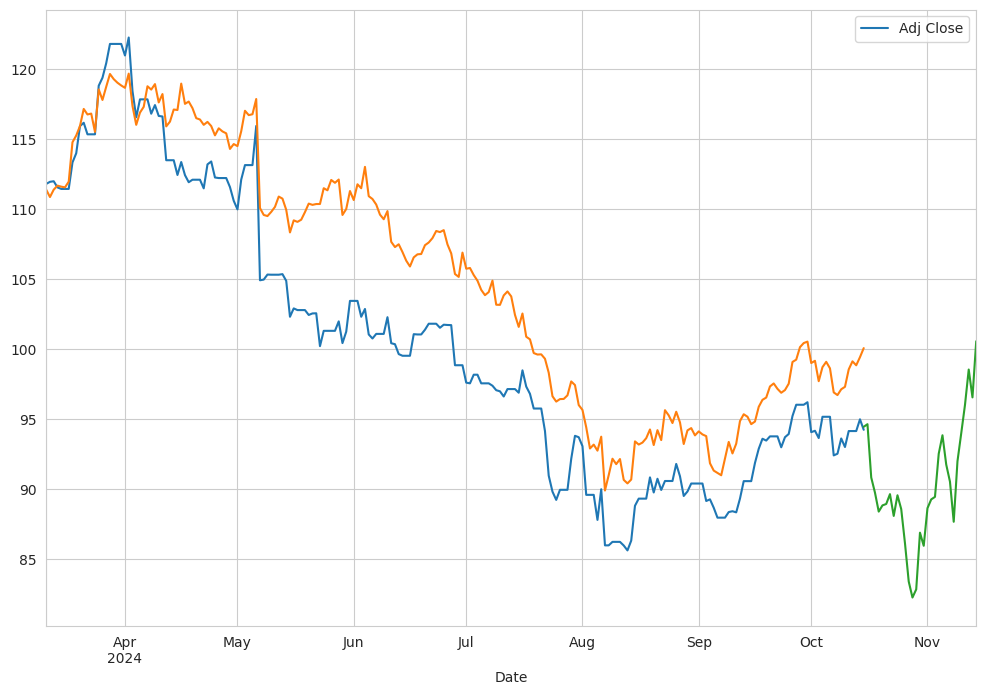

In [ ]:
# set style for seaborn plot
sns.set_style('whitegrid')
# set figure size
sns.mpl.rc('figure', figsize=(12, 8))

# set fig and ax
fig, ax = plt.subplots()

# choose optimal lags for this data
lags = ar_select_order(df_dis, maxlag=20)
print("Lags :", lags.ar_lags)

# create our model using whole data set
model = AutoReg(df_dis, lags.ar_lags)
model_fit = model.fit()

# define training and testing area
train_size = int(len(df_dis) * 0.8)
train_df = df_dis.iloc[:train_size]
test_df = df_dis.iloc[train_size:]

# define training model for x number of days
train_model = AutoReg(df_dis, 494).fit(cov_type="HC0")

# define start and end for prediction
start_pred = len(train_df)
end_pred = len(train_df) + len(test_df) - 1

prediction = train_model.predict(start=start_pred, end=end_pred, dynamic=True)

# plot testing data with prediction
ax = test_df.plot(ax=ax) # Orange
ax = prediction.plot(ax=ax) # Green

# predict 30 days into the future
forecast = train_model.predict(start=end_pred, end=end_pred+30, dynamic=True)
ax = forecast.plot(ax=ax) # Green